### condaの仮想環境 opencvで実行

## セクション3:画像処理の基礎

#### 11:画像の表示・出力

In [1]:
import cv2
import os

In [10]:
img = cv2.imread('data/src/Berry.jpg')

In [11]:
img.shape

(589, 960, 3)

In [13]:
img[0][0]

array([126, 176, 194], dtype=uint8)

In [14]:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
os.mkdir('./output')  #フォルダを作成

In [16]:
# 画像を保存する
cv2.imwrite('output/test.jpg',img)

True

#### 12.動画の表示・出力

In [17]:
import cv2
import sys

In [20]:
cap = cv2.VideoCapture('data/movie/Cosmos.mp4')
if cap.isOpened() == False:  # 読み込みNGの場合はプログラムを終了
    sys.exit()
ret, frame = cap.read()  # retにはTrue,Falseが入る。読み込めるとTrue
h, w =frame.shape[:2]
fourcc = cv2.VideoWriter_fourcc(*'XVID') # codecの設定
dst = cv2.VideoWriter('output/test.avi', fourcc, 30.0, (w,h)) # 30.0はFPSの設定

while True:
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imshow('img', frame)
    dst.write(frame)
    if cv2.waitKey(30) == 27: #30秒以内にEscボタンが押された場合
        break
cv2.destroyAllWindows()
cap.release() #メモリを解放する

#### 13.ウィンドウの調整

In [21]:
import cv2

In [26]:
# デフォルト設定
img = cv2.imread('data/src/Lena.jpg')
cv2.namedWindow('Window', cv2.WINDOW_AUTOSIZE) # ウィンドウの自動調整
cv2.imshow('Window',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
# ウィンドウのサイズを調整
img = cv2.imread('data/src/Lena.jpg')
cv2.namedWindow('Window', cv2.WINDOW_NORMAL) # ウィンドウのサイズを調整できる
cv2.imshow('Window',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# リサイズする
img = cv2.imread('data/src/Lena.jpg')
cv2.namedWindow('Window', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('window', 640, 480)
cv2.imshow('Window',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 14.リサイズ

In [29]:
img = cv2.imread('data/src/grapes.jpg')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
img.shape

(640, 960, 3)

In [31]:
# 幅、高さで設定する
size = (300, 200)
img_resize = cv2.resize(img, size)    

In [32]:
img_resize.shape

(200, 300, 3)

In [33]:
cv2.imshow('resize', img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
img_area = cv2.resize(img, size, interpolation = cv2.INTER_AREA) # 圧縮方法をINTER_AREA、この方が優れている
img_linear = cv2.resize(img, size, interpolation = cv2.INTER_LINEAR) #デフィルトはINTER_LINEAR
cv2.imshow('area', img_area)
cv2.imshow('linear',img_linear)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 15.色空間・グレースケール

In [40]:
img = cv2.imread('data/src/grapes.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Glayスケールに変換
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # HSVスケールに変換

In [41]:
img_gray.shape

(640, 960)

In [42]:
img_hsv.shape

(640, 960, 3)

In [43]:
cv2.imshow('img', img)
cv2.imshow('gray', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
# 引数を0を与えると、最初からグレースケールで読み込む
img_gray2 = cv2.imread('data/src/grapes.jpg', 0)
cv2.imshow('gray', img_gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 16.ヒストグラム

In [45]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
img = cv2.imread('data/src/Lena.jpg')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

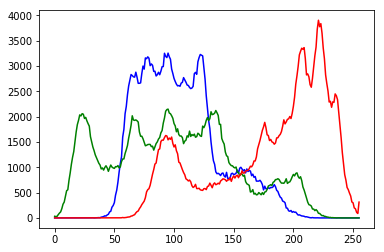

In [48]:
color_list = ['blue', 'green', 'red']
for i, j in enumerate(color_list):
    hist = cv2.calcHist([img],[i], None, [256], [0, 256]) #3番目の引数はマスク有無、4番目はbinの数
    plt.plot(hist,color = j)

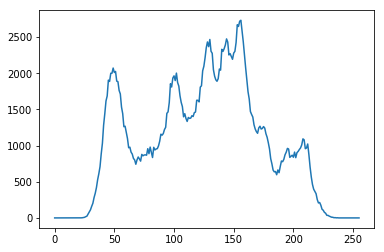

In [49]:
# グレースケールのヒストグラムを確認
img_gray = cv2.imread('data/src/Lena.jpg', 0)
hist2 = cv2.calcHist([img_gray], [0], None, [256], [0,256])
plt.plot(hist2)

#### 17.ヒストグラム均一化

In [50]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

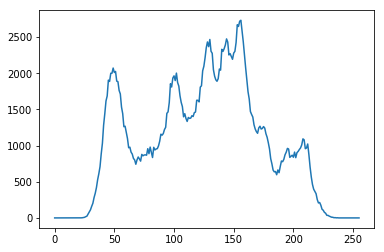

In [53]:
img = cv2.imread('data/src/Lena.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)

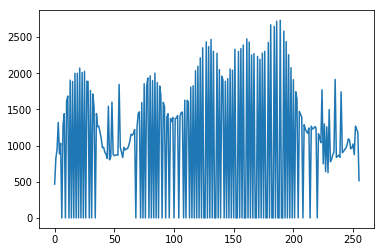

In [55]:
img_eq = cv2.equalizeHist(img) # ヒストグラムの均一化を行う
hist_e = cv2.calcHist([img_eq], [0], None, [256], [0, 256])
plt.plot(hist_e)

In [ ]:
cv2.imshow('img', img)
cv2.imshow('eq', img_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 18.γ変換

In [1]:
import cv2
import numpy as np

In [12]:
gamma = 0.4
img = cv2.imread('data/src/Berry.jpg')
gamma_cvt = np.zeros((256,1), dtype=np.uint8)
for i in range(256):
    gamma_cvt[i][0] = 255 * (float(i)/255) ** (1.0 / gamma)
    
img_gamma = cv2.LUT(img, gamma_cvt)

cv2.imshow('img', img)
cv2.imshow('gamma',img_gamma)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 19. トラックバーの作成

In [13]:
import cv2

In [14]:
def onTrackbar(position):
    global trackValue
    trackValue = position
    
trackValue = 100    
cv2.namedWindow('img')
cv2.createTrackbar('track', 'img', trackValue, 255, onTrackbar)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 20. マウスイベント

In [1]:
import numpy as np
import cv2

In [6]:
def print_position(event, x, y, flags, param):
    # ダブルクリックした場所の座標を返す
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print(x,y)
img = np.zeros((512, 512), np.uint8)  # 仮画像を作成
cv2.namedWindow('img')
cv2.setMouseCallback('img', print_position)  # ダブルクリックすると座標を返す
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()  

145 264
179 185
411 66
455 216
14 7


#### 21.図形の描画・文字の記述

In [21]:
img = np.ones((500, 500, 3), dtype=np.uint8)*255 #白の画像を作成

cv2.line(img, (0,0), (150,190), (255, 0, 0), 2)  # 始点、終点、color, 太さ
cv2.rectangle(img,(100,25), (300, 150), (0,255,0),4) # 左上の点、右下の点、color, 太さ
cv2.circle(img,(100,100), 55, (0, 0, 255), -1) # 中心座礁,半径、color, 太さ(-1で中を塗りつぶす)
cv2.ellipse(img, (250, 250), (100, 50), 20, 0, 360, (255, 0, 0), 1) #中心座標,長さの比,楕円の角度,スタート位置、終了位置,color,太さ

pts = np.array([[100, 30], [200, 30], [200, 80], [100, 50]])
cv2.polylines(img, [pts], False, (200,255,0),3) # 座標、始点と終点を結ぶか,color,太さ

font = cv2.FONT_HERSHEY_SIMPLEX #fontの指定
cv2.putText(img, 'OpenCV', (100, 300), font, 1, (0,255,0), 3, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 22. ２値化

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('data/src/grapes.jpg', 0)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [6]:
threshold = 100
ret, img_th = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY) # 画像、th,thを超えた時の値、2値化の方法

In [7]:
ret # 閾値を表示

100.0

In [8]:
cv2.imshow('img_th', img_th)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [9]:
# 大津の2値化は、2値化のしきい値を自動的に求める手法
ret2, img_o = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

In [10]:
ret2

121.0

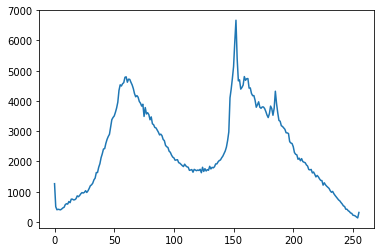

In [11]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)

In [12]:
cv2.imshow('otsu', img_o)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# アダプティブスレッショルド処理. 近傍から閾値を求めて変換する
img_ada = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 1)

In [14]:
cv2.imshow('otsu', img_o)
cv2.imshow('ada', img_ada)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 23. 2値化+トラックバー

In [15]:
import cv2

In [16]:
img = cv2.imread('data/src/floor.jpg',0)

In [17]:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
def onTrackbar(position):
    global threshold
    threshold = position
cv2.namedWindow('img')
threshold = 100
cv2.createTrackbar('track', 'img', threshold, 255, onTrackbar)
while True:
#    ret, img_th = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    img_th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, threshold)
    cv2.imshow('img', img_th)
    cv2.imshow('src', img)
    if cv2.waitKey(10) == 27: # escキーが押されたら
        break
cv2.destroyAllWindows()        